# Full Literature Search

**Author**: Jack Galbraith-Edge

In [60]:
# Import Notebook Setup
from msc_code.scripts.notebook_setup import *

## Concatination of Database dataframes and Duplicate Removal

In [61]:
# define data dictionary to store search results in
data = {}

# import dataframes into data dictionary
data["pubmed"] = pd.read_csv("/".join([RAW_DATA_DIR, "database_search", "pubmed.csv"]))          # PubMed
data["embase"] = pd.read_csv("/".join([RAW_DATA_DIR, "database_search", "embase.csv"]))          # Embase
data["cochrane"] = pd.read_csv("/".join([RAW_DATA_DIR, "database_search", "cochrane.csv"]))      # Cochrane
data["wos"] = pd.read_excel("/".join([RAW_DATA_DIR, "database_search", "wos.xls"]))              # WOS
data["scopus"] = pd.read_csv("/".join([RAW_DATA_DIR, "database_search", "scopus.csv"]))          # SCOPUS        
data["psycinfo"] = pd.read_csv("/".join([RAW_DATA_DIR, "database_search", "psycinfo.csv"]))      # PyscINFO

### Standardise Dataframe Column Headers.
- Dataframes imported from database searches contain numerous fields, and they differ between databases.
- The columns to have in the final dataframe that will be used for title and abstract screening to standardise the data.
- In this stage, I will rename certain columns in specific database dataframes and then concatinate the dataframes into one final dataframe for title and abstract screening.

In [62]:
# define desired column headers for later extraction to final dataframe
desired_columns = [
    "Publication Year",
    "First Author",
    "Authors",
    "Publication Title",
    "Title",
    "Abstract",
    "DOI",
    "Database"
]

print(f"The columns I want in my final dataframe are: {desired_columns}")

The columns I want in my final dataframe are: ['Publication Year', 'First Author', 'Authors', 'Publication Title', 'Title', 'Abstract', 'DOI', 'Database']


#### Rename column headers
- For each database dataframe.

##### PubMed

In [63]:
# rename pubmed dataframe columns to fit desired column headers 
data["pubmed"].rename(columns={     # rename columns
    "Abstract Note": "Abstract",    # rename 'Abstract Note' as 'Abstract'
    "Key": "PMID",                  # rename 'Key' as 'PMID'
    "Author": "Authors"             # rename 'Author' as 'Authors'
}, inplace=True)                    # keep changes in place on original dataframe

# create first author column formatted as Surname, F.
data["pubmed"]["First Author"] = (
    data["pubmed"]["Authors"]
    .fillna("")                     # Replace NaN with an empty string
    .str.split(";")                 # Split multiple authors by ';'
    .str[0]                         # Take the first author
    .str.strip()                    # Remove leading/trailing spaces
    .apply(lambda name: f"{name.split()[0]} {name.split()[1][0]}." if len(name.split()) > 1 else name)
)   # format final First Author string as Surname, F.

##### Embase

In [64]:
# Rename embase dataframe columns to fit desired column headers
data["embase"].rename(columns={             # rename columns
    "Medline PMID": "PMID",                 # 'Medline PMID' as 'PMID'
    "Source title": "Publication Title",    # 'Source title' as 'Publication Title'
    "Author Names": "Authors"               # 'Author Names' as 'Authors'
}, inplace=True)    

# create first author column formatted as Surname, F.
data["embase"]["First Author"] = (
    data["embase"]["Authors"]
    .fillna("")  # Replace NaN with an empty string
    .str.split(";")  # Split multiple authors by ';'
    .str[0]  # Take the first author
    .str.strip()  # Remove leading/trailing spaces
    .apply(
        lambda name: f"{name.split()[0]}, {name.split()[1][0]}." 
        if len(name.split()) > 1 else name
    )   # format final First Author string as Surname, F.
    .str.rstrip(",")  # Remove trailing commas if present
)

##### Cochrane

In [65]:
# Rename cochrane columns to fit desired column headers
data["cochrane"].rename(columns={           # Rename columns
    "Year": "Publication Year",             # 'Year' as 'Publication Year'
    "Source": "Publication Title",          # 'Source' as 'Publication Title'
    "Author(s)": "Authors"                  # 'Author(s) as 'Authors'
}, inplace=True)                            # in place on original dataframe

# create first author column formatted as Surname, F.
data["cochrane"]["First Author"] = (
    data["cochrane"]["Authors"]
    .fillna("")  # Replace NaN with an empty string
    .str.split(";")  # Split multiple authors by ';'
    .str[0]  # Take the first author
    .str.strip()  # Remove leading/trailing spaces
    .apply(
        lambda name: f"{name.split()[0]} {name.split()[1][0]}." 
        if len(name.split()) > 1 else name
    )   # format final First Author string as Surname, F.
    .str.rstrip(",")  # Remove trailing commas if present
)

##### Web of Science

In [66]:
# Rename Web of Science columns to fit desired column headers
data["wos"].rename(columns={                # rename columns
    "Pubmed Id": "PMID",                    # 'Pubmed Id' as 'PMID'
    "Article Title": "Title",               # 'Article Title' as 'Title'
    "Source Title": "Publication Title"     # 'Source Title' as 'Publication Title'
}, inplace=True)                            # Save changes in place on original dataframe

# create first author column formatted as Surname, F.
data["wos"]["First Author"] = (
    data["wos"]["Authors"]
    .fillna("")  # Replace NaN with an empty string
    .str.split(";")  # Split multiple authors by ';'
    .str[0]  # Take the first author
    .str.strip()  # Remove leading/trailing spaces
    .apply(
        lambda name: f"{name.split()[0]} {name.split()[1][0]}." 
        if len(name.split()) > 1 else name
    )   # format final First Author string as Surname, F.
    .str.rstrip(",")  # Remove trailing commas if present
)

##### SCOPUS

In [67]:
# rename wos columns to fit desired column headers
data["scopus"].rename(columns={
    "Year": "Publication Year",
    "PubMed ID": "PMID",
    "Source title": "Publication Title"
}, inplace=True)

# create first author column formatted as Surname, F.
data["scopus"]["First Author"] = (
    data["scopus"]["Authors"]
    .fillna("")  # Replace NaN with an empty string
    .str.split(";")  # Split multiple authors by ';'
    .str[0]  # Take the first author
    .str.strip()  # Remove leading/trailing spaces
    .apply(
        lambda name: f"{name.split()[0]}, {name.split()[1][0]}." 
        if len(name.split()) > 1 else name
    )
    .str.rstrip(",")  # Remove trailing commas if present
)

##### PsycINFO

In [68]:
# Rename PsycINFO column headers to fit desired column headers.
data['psycinfo'].rename(columns={           # rename columns
    "Abstract Note": "Abstract",            # 'Abstract Note' as 'Abstract'
    "Author": "Authors"                     # 'Author' as 'Authors'
}, inplace=True)                            # save changes in place on original dataframe.

# Create first author column formatted as Surname, F.
data["psycinfo"]["First Author"] = (      
    data["psycinfo"]["Authors"]
    .fillna("")  # Replace NaN with an empty string
    .str.split(";")  # Split multiple authors by ';'
    .str[0]  # Take the first author
    .str.strip()  # Remove leading/trailing spaces
    .apply(
        lambda name: f"{name.split()[0]} {name.split()[1][0]}." 
        if len(name.split()) > 1 else name
    )   # format final First Author string as Surname, F.
    .str.rstrip(",")  # Remove trailing commas if present
)

##### Add Database column

In [69]:
# add Database column to each dataframe so I know which database each source came from.
for key, df in data.items():
    if key == "pubmed":
        df['Database'] = "PubMed"
    elif key == "embase":
        df['Database'] = "Embase"
    elif key == "cochrane":
        df['Database'] = "Cochrane"
    elif key == "wos":
        df['Database'] = "Web of Science"
    elif key == "scopus":
        df['Database'] = "SCOPUS"
    elif key == "psycinfo":
        df['Database'] = "PsycINFO"
    else:
        df['Database'] = "Unknown"

### Create Final Dataframe
- Combine desired columns from each database into one large dataframe for analysis and export for Title and Abstract Screening.

#### Extract desired columns for database dataframes.

In [70]:
extracted_data = [] # create list in which to store extracted data.
for database, df in data.items():       # iterate through each database and corresponding dataframe in data dictionary
    extracted_df = df[desired_columns]  # select predefined desired columns from selected dataframe and extract to new dataframe.
    extracted_data.append(extracted_df) # append the extracted dataframe to a the list of extracted data.

# Combine/concatinate all extracted DataFrames in extracted_data list into a single DataFrame called final_df (dataframe)
final_df = pd.concat(extracted_data, ignore_index=True)

# Ensure that no rows/papers are lost by countingfinal

# calculate the number of papers before dataframes were
preextraction_paper_count = 0               # define variable pre-extraction paper count and set to 0.
for database, df in data.items():           # iterate through each database and corresponding dataframe in data dictionary
    preextraction_paper_count += len(df)    # add the length of selected dataframe to the pre-extraction count

# Calculate number of papers after concantination of desired columns from database dataframes.
postextraction_paper_count = len(final_df)  # postextraction_paper_count = length of the final dataframe.

# Print out result
print(f"There were {preextraction_paper_count} articles in the data before desired columns were extracted to a seperate dataframe. There are now {postextraction_paper_count} in the Final Dataframe. {preextraction_paper_count - postextraction_paper_count} papers were lost during this stage of processing.")

There were 673 articles in the data before desired columns were extracted to a seperate dataframe. There are now 673 in the Final Dataframe. 0 papers were lost during this stage of processing.


#### Format and Tidy Final Dataframe

In [71]:
# Reformat some journal information to aid removal of duplicates

# fix capitalisation in Publication Title column
final_df['Publication Title'] = final_df['Publication Title'].str.title()

# sort by publication year, then first author
final_df = final_df.sort_values(by=["Publication Year", "First Author"]).reset_index(drop=True)

# titlise first author column
final_df["First Author"] = final_df["First Author"].str.title()

# strip full stops from end of journal titles
final_df["Title"] = (
    final_df["Title"]
        .str.strip(".")
        .str.replace(r"[()\[\]{}]", "", regex=True)
        .str.capitalize()
)

# remove word the from beginning of journal titles
final_df["Publication Title"] = final_df["Publication Title"].str.replace(r"^The\s+", "", regex=True)

# reformat DOI to lower case
final_df["DOI"] = final_df["DOI"].str.lower()

pre_duplicate_removal_count = len(final_df)

In [72]:
# Export complete initial database search results, before duplicate removal
export_path = os.path.join(PROC_DATA_DIR, 'database_search', 'database_search_results_initial.csv')
final_df.to_csv(export_path)

### Database Counts

In [73]:
### Database counts
database_counts = pd.DataFrame({
    'Database': list(data.keys()),                  # Database label
    'Count': [len(df) for df in data.values()]      # Count is the length of each dataframe 
})

# reorder by count descending
database_counts = database_counts.sort_values(by='Count', ascending=False)

# Fix capitalisation of Database names
database_counts.loc[0, 'Database'] = 'PubMed'
database_counts.loc[1, 'Database'] = 'Embase'
database_counts.loc[2, 'Database'] = 'Cochrane'
database_counts.loc[3, 'Database'] = 'WoS'
database_counts.loc[4, 'Database'] = 'SCOPUS'
database_counts.loc[5, 'Database'] = 'PsycINFO'

# display
export_path = os.path.join(PROC_DATA_DIR, 'database_search', 'database_search_counts_initial.csv')
database_counts.to_csv(export_path, index=False)


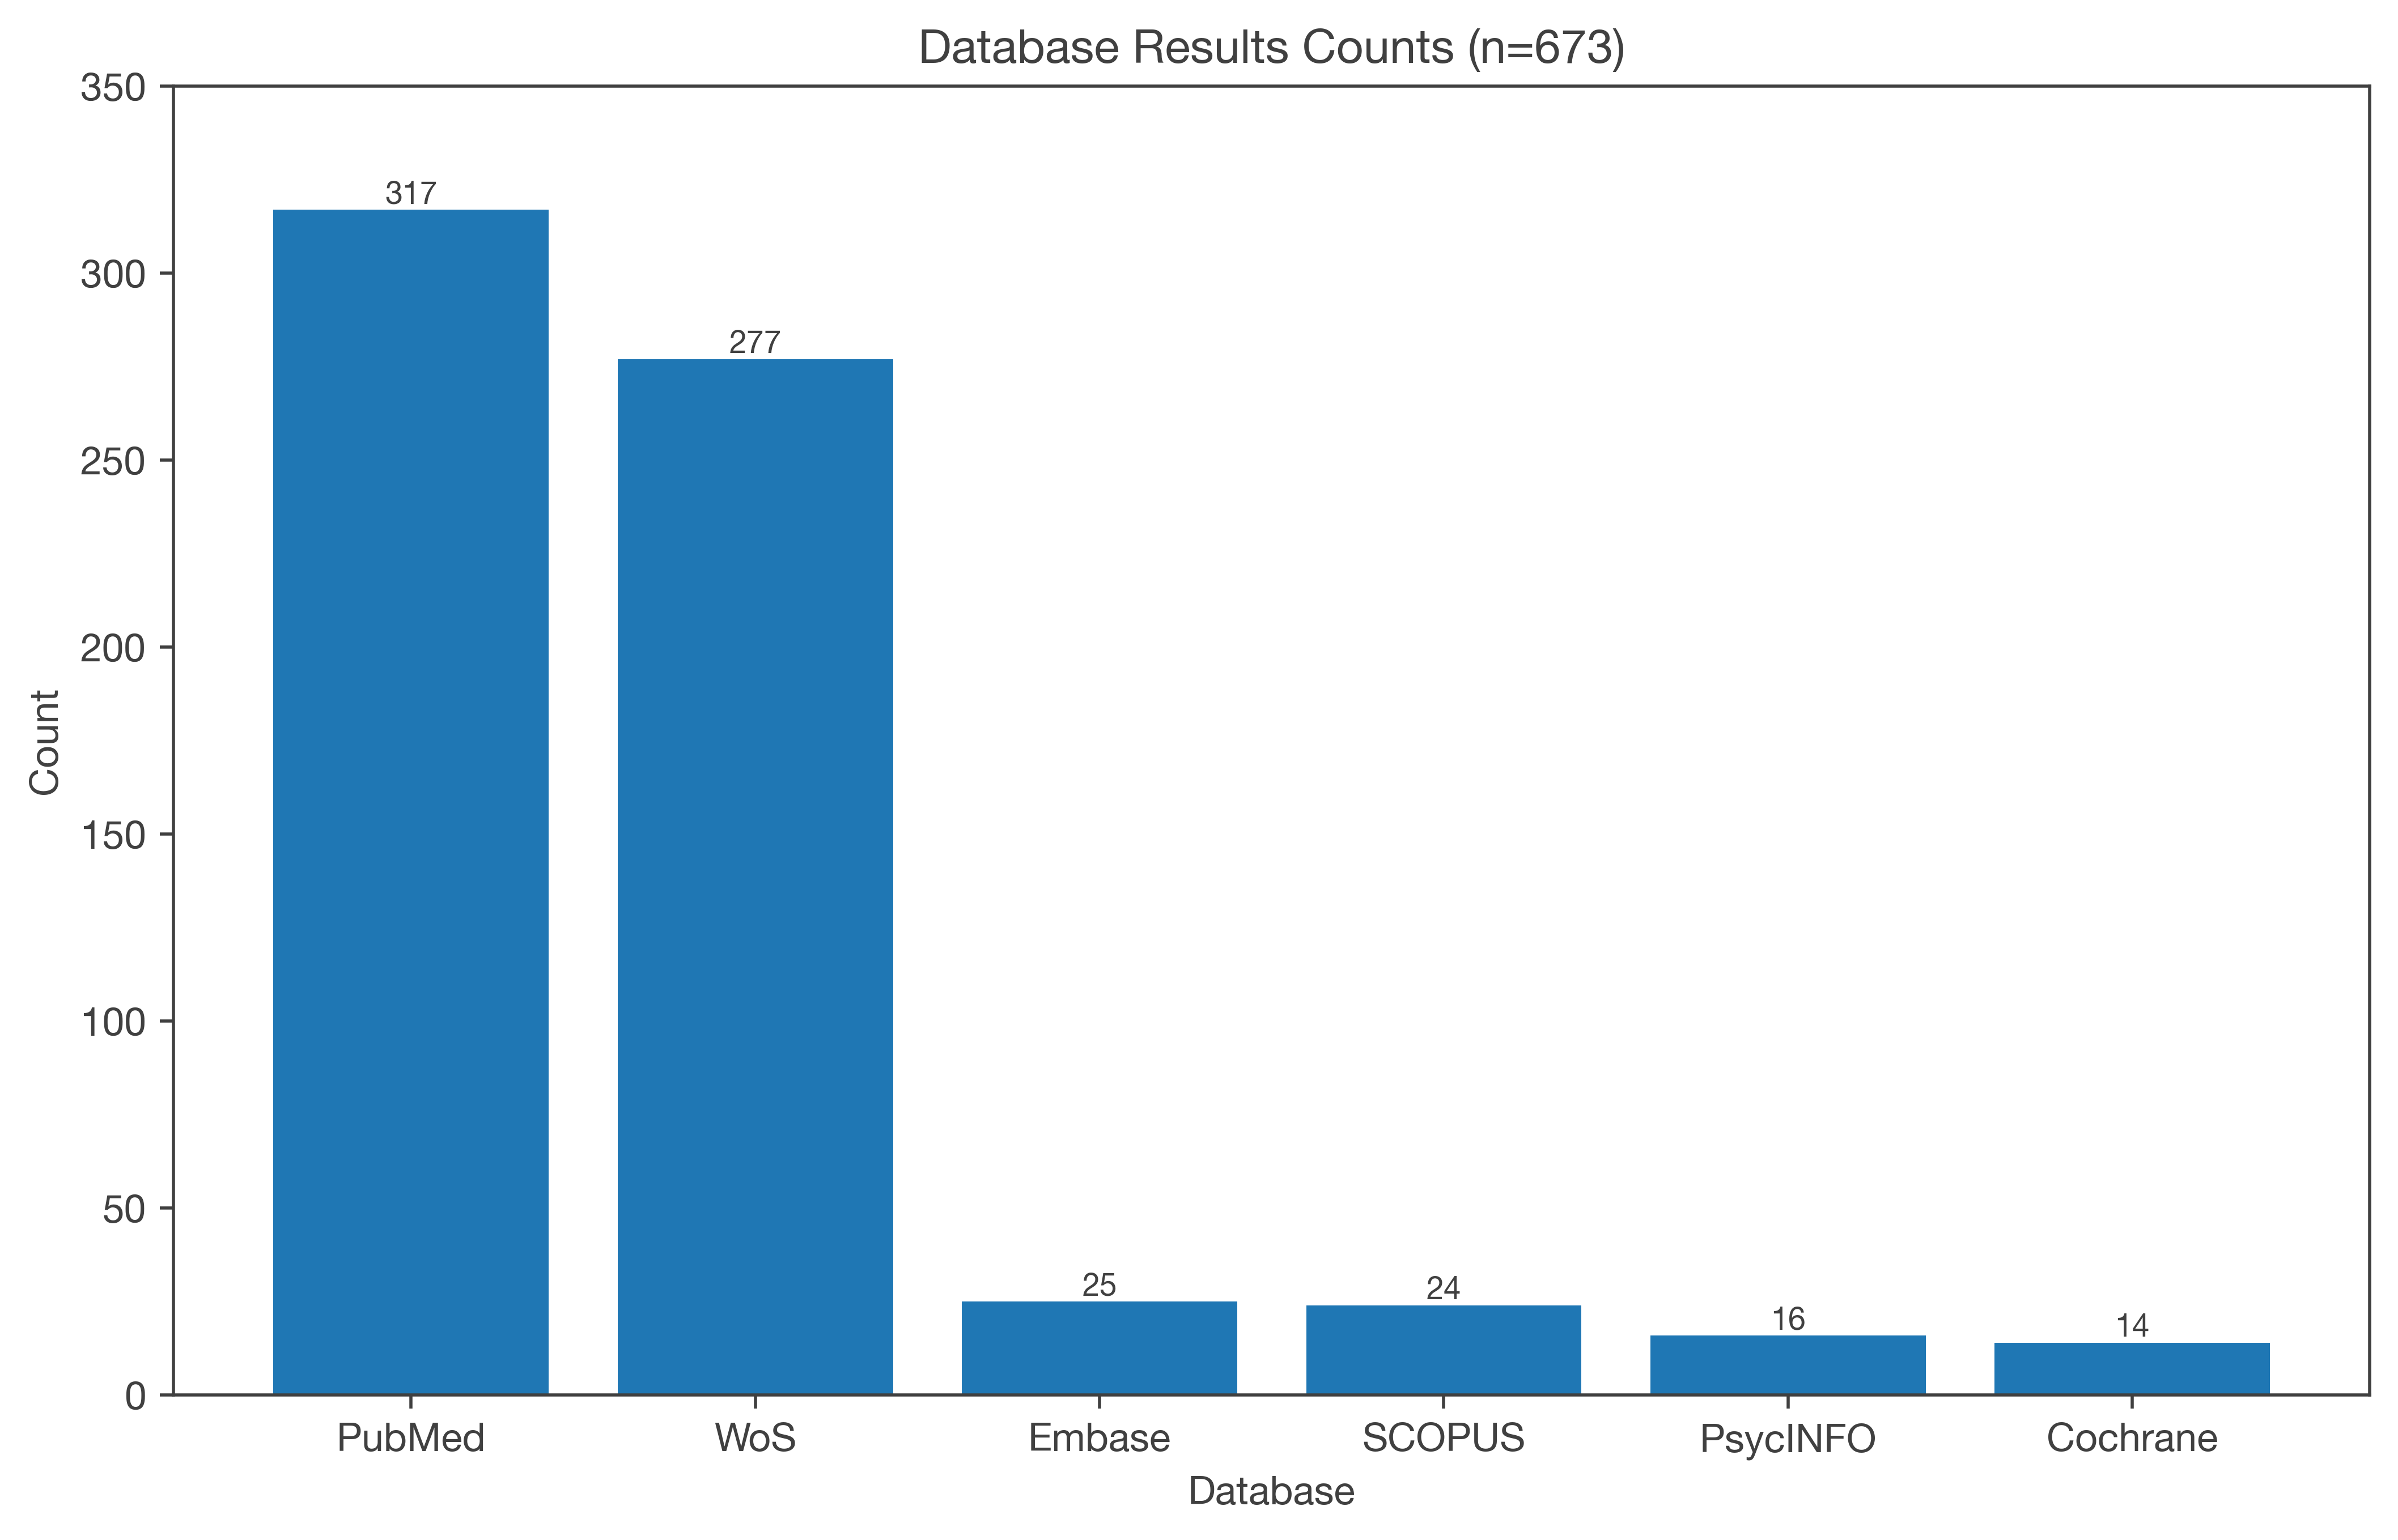

In [74]:
plt.bar(x=database_counts['Database'], 
        height=database_counts['Count'])
plt.ylim(top=350)

# label each bar with its numeric value
for i, count in enumerate(database_counts['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)

plt.title(f"Database Results Counts (n={preextraction_paper_count})")
plt.xlabel("Database")
plt.ylabel("Count")


# Save plot to figures directory
plot_path = os.path.join(FIG_DIR, "database_results_counts_plot.png")
plt.savefig(plot_path, bbox_inches="tight")

plt.show()

### Remove Duplicates

In [75]:
# Define comparison_columns to compare when assessing for duplicates.
comparison_columns=["Publication Year", "First Author", "Publication Title", "Title", "DOI"] # define comparison columns to compare duplicates against.

# Step 1: Find duplicates by comparison columns
dupes_by_comparison = final_df[final_df.duplicated(subset=comparison_columns, keep="first")]

# Step 2: Remove them from final_df
final_df = final_df.drop_duplicates(subset=comparison_columns, keep="first")

# Step 3: Find duplicates by DOI (after previous step)
dupes_by_doi = final_df[final_df.duplicated(subset="DOI", keep="first")]

# Step 4: Remove them from final_df
final_df = final_df.drop_duplicates(subset="DOI", keep="first")

# Step 5: Combine both sets of duplicates into a new df
database_search_results_duplicates = pd.concat([dupes_by_comparison, dupes_by_doi], ignore_index=True)

# Count number of results left after duplicates removed
post_duplicate_removal_count = len(final_df)

# Calculate number of duplicates removed
duplicates_removed_count = len(database_search_results_duplicates)

print(f"Duplicates removed: {duplicates_removed_count}") # Print result

# Create dataframe of number of duplicates removed to export to CSV for use with PRISMA flow chart.
duplicates_removed_df = pd.DataFrame([{
    "Reason": "Duplicate records removed\n",
    "Count": duplicates_removed_count
}])

# Export to CSV
database_search_results_duplicates.to_csv("/".join([PROC_DATA_DIR, "database_search", "database_search_results_duplicates.csv"]), index=False)
final_df.to_csv('/'.join([PROC_DATA_DIR, 'database_search', "database_search_results_no_duplicates.csv"]))

Duplicates removed: 313


#### Export to CSV for title and abstract screening.
- Add three blank columns titled "Exclude", "Reason Num" and "Reason" to final_df for export as csv. 
- "Exclude" will be boolean variable (True/False) to mark whether paper is to be excluded or not.
- "Reason ID" will be a numeric categorical variable will correspond to a table of exclusion criteria allowing for tracking an analysis of exclusion reasons, aiding PRISMA diagram.
- "Reason" will contain a brief description or note of why the paper was included, likely the same as the text version of the Reason ID.

In [76]:
# Add three blank columns titled "Exclude", "Reason Num" and "Reason" to final_df for export as csv
final_df["Exclude"] = None      # Add blank "Exclude" column
final_df["Reason ID"] = None    # Add blank "Reason ID" column
final_df["Reason"] = None       # Add blank "Reason" column

# Export to csv
final_df.to_csv("/".join([PROC_DATA_DIR, "database_search", "database_search_title_abstract_screen_start.csv"]), index=False)

### Summary

In [77]:
database_counts_prose = ", ".join([f"{row['Database']} ({row['Count']})" for _, row in database_counts.iterrows()])

print(f"Searches of {database_counts_prose} returned {sum(database_counts['Count'])} results.")

Searches of PubMed (317), WoS (277), Embase (25), SCOPUS (24), PsycINFO (16), Cochrane (14) returned 673 results.


### ASReview
This step was omitted as ASReview seemingly adds no benefit here.
Majority of papers were deemed relevant and need to full-text review.
All ASReview adds to this situation is using an AI model to suggest more relevant papers sooner and provides a nice user interface for use in the title and abstract screening process.
Labelling articles as 'ASReview Relevant' or 'ASReview irrelevant' in ASReview attaches a note to the .ris file, which can then be read and interpreted in a reference manager. Whilst I intend to use a reference manager (Zotero), I would rather organise and label title and abstracts in Microsoft Excel, then later import the relevant papers (papers not excluded) to Zotero for full text screening. Using excel in this way also allows for categorising of exclusions which will benefit a PRISMA diagram.
Can revisit this decision if things change.

## Bias

- Expanding foam and other expanding chemicals were excluded
    - Hardened plaster also excluded.